# Lab 2a: Clasificación Binaria

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FCEIA-AAII/lab1/blob/main/lab2a.ipynb)

## Preparación del entorno

Si no estamos parados en el repo, clonar y cd al repo. Esto nos permite usar el mismo notebook tanto local como en Google Colab.

In [1]:
import os

REPO_NAME = "lab2"
if REPO_NAME not in os.getcwd():
  if not os.path.exists(REPO_NAME):
    !git clone https://github.com/FCEIA-AAII/{REPO_NAME}.git
  os.chdir(REPO_NAME)

Cloning into 'lab2'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 42 (delta 21), reused 32 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (42/42), 1.88 MiB | 6.37 MiB/s, done.
Resolving deltas: 100% (21/21), done.


## Análisis Exploratorio.

Importar librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

Establecer GPU por defecto en caso de estar disponible

In [3]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

Cargar y visualizar los datos.

In [4]:
data = pd.read_csv('dataset-lab2.csv')
print(data.head())

         X1        X2    Y
0  0.812761  0.739781  1.0
1  0.812057  0.259719  1.0
2  0.857711  0.434979  1.0
3  0.460648  0.432698  0.0
4  0.776138  0.635665  1.0


Plot de los datos.

X1 shape: (1000,)
X2 shape: (1000,)
Y shape: (1000,)


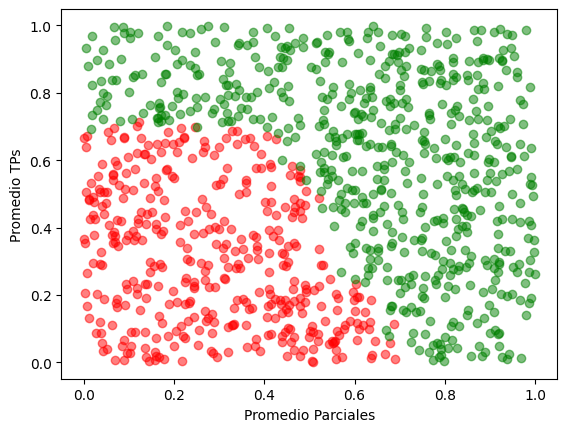

In [8]:
X1 = data['X1'].to_numpy()
X2 = data['X2'].to_numpy()
Y = data['Y'].to_numpy()

print("X1 shape:", X1.shape)
print("X2 shape:", X2.shape)
print("Y shape:", Y.shape)

plt.scatter(X1[Y == 0], X2[Y == 0], color='red', alpha=0.5)
plt.scatter(X1[Y == 1], X2[Y == 1], color='green', alpha=0.5)

plt.xlabel('Promedio Parciales')
plt.ylabel('Promedio TPs')

plt.show()

Definimos nuestro modelo usando tensorflow.

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

Definimos una función para plotear la frontera de decisión sobre los datos.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


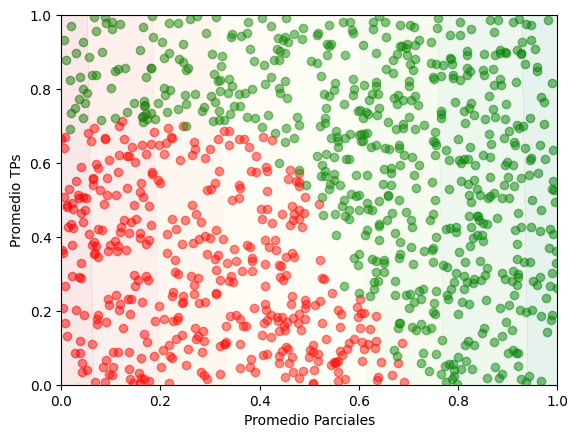

In [9]:
def plot_results(X1, X2, Y, model):
    plt.scatter(X1[Y == 0], X2[Y == 0], color='red', alpha=0.5)
    plt.scatter(X1[Y == 1], X2[Y == 1], color='green', alpha=0.5)

    plt.xlabel('Promedio Parciales')
    plt.ylabel('Promedio TPs')

    x1 = np.linspace(0, 1, 100)
    x2 = np.linspace(0, 1, 100)

    # Create a meshgrid with all the possible combinations of x1 and x2
    x1, x2 = np.meshgrid(x1, x2, indexing='ij')

    # This is equivalent to
    # x = np.array([[i, j] for i in x1 for j in x2])
    x = np.array([x1.ravel(), x2.ravel()]).T

    # Predict the value for each point in the meshgrid
    y = model.predict(x).reshape(x1.shape)

    # Use cmap red and green
    plt.contourf(x1, x2, y, alpha=0.1, cmap='RdYlGn')

    # Draw the decision boundary
    plt.contour(x1, x2, y, levels=[0.5], colors='blue')

    plt.xlim(0, 1)
    plt.ylim(0, 1)

    plt.show()

plot_results(X1, X2, Y, model)

Entrenamos el modelo.

In [11]:
# El optimizador es el algoritmo que se encarga de minimizar la función de costo
# Más adelante vamos a ver más en detalle cómo funciona cada uno
# Por ahora, usamos el optimizador Adam, es una versión mejorada de gradient descent.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

x = np.column_stack([X1, X2])
y = Y
print(x.shape)
print(y.shape)
model.fit(x=x, y=y, epochs=50)

(1000, 2)
(1000,)
Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8053 - loss: 0.3909
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9241 - loss: 0.2060
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9180 - loss: 0.2097
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9134 - loss: 0.1893
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9006 - loss: 0.1949 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9269 - loss: 0.1813 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9243 - loss: 0.1653
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9242 - loss: 0.1818
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8927 - loss: 0.1941
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9132 - loss: 0.2005
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9210 - loss: 0.1657
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - a

Plot de la frontera de decisión.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


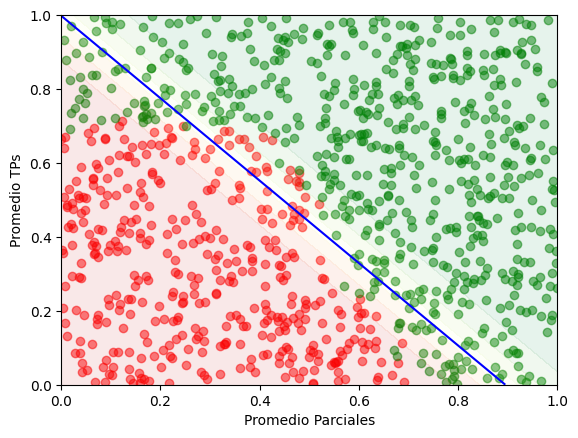

In [12]:
plot_results(X1, X2, Y, model)

Vemos que el modelo no tiene la complejidad suficiente como para representar la frontera de decisión.

Probemos entonces con un modelo más complejo.

*Nota: el entrenamiento puede no converger a una solución óptima. Se propone correr el entrenamiento varias veces hasta que se obtenga una solución aceptable. Más adelante estudiaremos técnicas para mejorar la convergencia.*

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6165 - loss: 0.6395
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9151 - loss: 0.2325
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9115 - loss: 0.2123
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9087 - loss: 0.2005
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9158 - loss: 0.1784
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9297 - loss: 0.1627
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9276 - loss: 0.1696
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9314 - loss: 0.1618
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9333 - loss: 0.1435
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9506 - loss: 0.1240
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9530 - loss: 0.1253
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9528 - lo

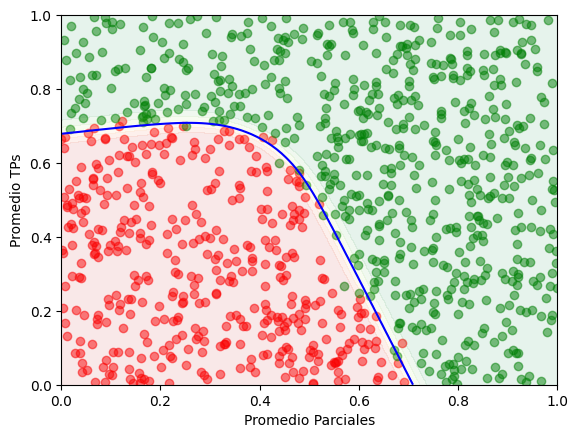

In [32]:
model = tf.keras.Sequential([
    # Completar con:
    # 1. Una capa de entrada con las dimensiones correspondientes.
    tf.keras.layers.Input(shape=(2,)),
    # 2. Una capa oculta con 2 neuronas y función de activación sigmoid.
    tf.keras.layers.Dense(units=2, activation='sigmoid'),
    # 3. Una capa de salida con 1 neurona y función de activación sigmoid.
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Pueden probar con distintos valores de learning rate y ver cómo afecta el entrenamiento
optimizer = tf.keras.optimizers.Adam(learning_rate=0.3)
#probando con uno muy bajo (0.01), obtuve rectas: underfitting. Con 0.1 ya tuvo una frontera aceptable, pero le llevo 1 o 2s más que usando 0.5. Con 0.3 fue optimo. un lr
#elevado (0.9) llevo a underfitting
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x=x, y=y, epochs=50)

plot_results(X1, X2, Y, model)